# 02 - Airbnb listings in Paris 🏡

---

<img src="https://fintech-mag.com/wp-content/uploads/2018/03/paul-dufour-175889-unsplash.jpg" />

Photo by [Paul Dufour](https://unsplash.com/@bill_bokeh)

Let's go deeper in our understanding of data visualizations and in our skills at manipulating real life data.

In this challenge, we will explore **Airbnb data from Paris listings**. The objective is to answer the following question:

> **How does location impact listing price?**

The data, that you will collect from [InsideAirbnb](http://insideairbnb.com/get-the-data.html) is a very complete dataset of Airbnb listings.

Feel free to play around, and to draw visualizations in order to better understand the data.


---

**Q1**. 🇫🇷 Download and load data of **Airbnb Paris listings** from http://insideairbnb.com/. 

> 🔦 **Hint**: For extracting a `.gz` file using command line, run:
>
> `gunzip archive.gz`

- How many lines and columns does it contain?
- As it contains many columns, some do not appear with `head` method. Print the names of the different columns.

In [4]:
# TODO - Download and load dataset
### STRIP_START
!wget "http://data.insideairbnb.com/france/ile-de-france/paris/2018-12-07/data/listings.csv.gz"
!gunzip listings.csv.gz
!ls
### STRIP_END!

02-Airbnb-Visualization.ipynb listings.csv


In [10]:
# TODO - Download and load dataset
### STRIP_START
import pandas as pd
data = pd.read_csv("listings.csv", parse_dates=['last_scraped'])
data.head()
### STRIP_END

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2577,https://www.airbnb.com/rooms/2577,20181207151406,2018-12-08,Loft for 4 by Canal Saint Martin,"100 m2 loft (1100 sq feet) with high ceiling, ...",The district has any service or shop you may d...,"100 m2 loft (1100 sq feet) with high ceiling, ...",none,NaN,...,t,NaN,{PARIS},t,f,strict_14_with_grace_period,f,f,1,NaN
1,3109,https://www.airbnb.com/rooms/3109,20181207151406,2018-12-08,zen and calm,Appartement très calme de 50M2 Belle lumière D...,I bedroom appartment in Paris 14,I bedroom appartment in Paris 14,none,NaN,...,t,NaN,{PARIS},f,f,flexible,f,f,1,0.29
2,5396,https://www.airbnb.com/rooms/5396,20181207151406,2018-12-08,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","Small, well appointed studio apartment at the ...","Cozy, well-appointed and graciously designed s...",none,"You are within walking distance to the Louvre,...",...,t,NaN,{PARIS},t,f,strict_14_with_grace_period,f,f,1,1.29
3,7397,https://www.airbnb.com/rooms/7397,20181207151406,2018-12-08,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",PLEASE ASK ME BEFORE TO MAKE A REQUEST !!! No ...,"VERY CONVENIENT, WITH THE BEST LOCATION ! PLEA...",none,NaN,...,t,7510400829623,{PARIS},f,f,moderate,f,f,1,2.47
4,7964,https://www.airbnb.com/rooms/7964,20181207151406,2018-12-08,Large & sunny flat with balcony !,Very large & nice apartment all for you! - Su...,hello ! We have a great 75 square meter apartm...,Very large & nice apartment all for you! - Su...,none,NaN,...,t,NaN,{PARIS},f,f,strict_14_with_grace_period,f,f,1,0.06


In [11]:
# TODO - Get shape, print columns
### STRIP_START
print("Data has shape: {}".format(data.shape))
print("Columns: {}".format(data.columns))
### STRIP_END

Data has shape: (59881, 96)
Columns: Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type'

**Q2**. Let's clean a bit this dataset:
- Does it contain only data from Paris city? If not make sure to filter only on Paris listings.
- Also, keep only listings with location as exact (`is_location_exact` column)

In [12]:
#TODO - Clean dataset
### STRIP_START
print("Dataset contains more than Paris listings and `city` column is not clean:\n{}".format(
    data.city.unique()))
print("\n---\n")
print("We are going to use the column `jurisdiction_names` which is cleaner:\n{}".format(
    data.jurisdiction_names.unique()))
### STRIP_END

Dataset contains more than Paris listings and `city` column is not clean:
['Paris' 'Paris, 4th arrondissement' 'Saint-Mandé' 'Paris '
 'Paris-13E-Arrondissement' 'Levallois-Perret' 'Paris-2E-Arrondissement'
 'Paris 4e arrondissement' nan 'Vincennes' 'Boulogne-Billancourt'
 'Le Pré-Saint-Gervais' 'Paris 19eme' 'Pantin' 'paris' 'PARIS'
 'Paris-19E-Arrondissement' 'Paris 11e arrondissement'
 'Le Kremlin-Bicêtre' 'Montmartre Paris ' 'Paris 8è' 'NEUILLY SUR SEINE'
 'PARIS 3eme' 'Issy-les-Moulineaux' 'vanves' 'Nogent-sur-Marne'
 'Issy les moulineaux' 'París' 'PARIS 02' 'Paris-10E-Arrondissement'
 'Paris 16' 'Paris 6e arrondissement' 'Paris 10' 'Paris 18e' 'Paris city'
 'Neuilly Sur Seine ' 'Bagnolet' 'Montrouge' 'PARIS 05'
 'Neuilly-sur-Seine' '75020 Paris' 'Paris-16E-Arrondissement'
 'Charenton Le Pont - limitrophe avec paris ' 'Paris-20E-Arrondissement'
 'Paris-11E-Arrondissement' 'Paris-18E-Arrondissement' 'Clichy' 'Parijs'
 'Париж' 'Neuilly' 'Paris-8E-Arrondissement' 'Paris-5E-Arrondisse

In [14]:
#TODO - Clean dataset
### STRIP_START
print("We filter only on Paris (no matter the uppercase and lowercase)\
and is_location_exact == 't'")
print("\n---\n")

data = data[(data["jurisdiction_names"].isin(['{Paris}', '{PARIS}'])) &
            (data["is_location_exact"] == 't')]

print("We now have a dataset of shape: {}, we removed {} lines.".format(
    data.shape, 59881 - data.shape[0]))
### STRIP_END

We filter only on Paris (no matter the uppercase and lowercase)and is_location_exact == 't'

---

We now have a dataset of shape: (50298, 96), we removed 9583 lines.


**Q3**. Let's understand better the listings price and draw some visualization with Seaborn
- Observe price distribution with a **box plot** - Reference: https://en.wikipedia.org/wiki/Box_plot
- Do you think there are some outliers? If yes, remove them
- Finally, visualize the cleaned distribution of the listings price with a **histrogram plot**
- Comment

> 🔦 **Hint**:  You might want to clean the column before starting your analysis 🙂
>
> In order to apply a defined function `my_func` to a column (Series), you can use `apply` method:
> ``` python
>  data[column_name].apply(lambda x: my_func(x))
> ```

In [15]:
#TODO - Visualize Price Distribution
### STRIP_START
# Price is formatted as $9,999.99 so we need to clean the column first (remove the "$"" and the ",")
# We can use `apply` method to the Series data["price"] which apply a defined function

def clean_price_col(x):
    return float(x.replace("$", "").replace(",", ""))

data["price"] = data["price"].apply(lambda x: clean_price_col(x))

# Let's check first values of the new column to make sure it's clean
data.price[0:10]
### STRIP_END

0     125.0
2     115.0
3     115.0
4      99.0
5      90.0
6      75.0
7      70.0
8     135.0
9     105.0
10     80.0
Name: price, dtype: float64

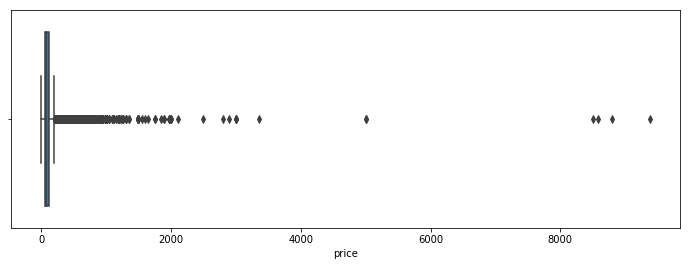

In [18]:
#TODO - Visualize Price Distribution
### STRIP_START
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))
sns.boxplot(data["price"])
plt.show()
### STRIP_END

In [19]:
#TODO - Visualize Price Distribution
### STRIP_START
print("Many outliers! We can't even see the moustache plot. \
Let's only keep listings whose price is below 1000$ per night")
### STRIP_END

Many outliers! We can't even see the moustache plot. Let's only keep listings whose price is below 1000$ per night


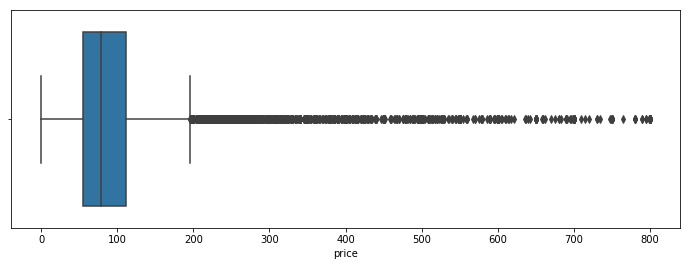

count    50145.000000
mean        99.747871
std         78.797299
min          0.000000
25%         55.000000
50%         79.000000
75%        111.000000
max        800.000000
Name: price, dtype: float64

In [21]:
#TODO - Visualize Price Distribution
### STRIP_START

# We remove outliers and visualize the boxplot
data = data[data["price"]<=800]
plt.figure(figsize=(12, 4))
sns.boxplot(data["price"])
plt.show()

# We can describe this boxplot with figures:
data["price"].describe()

### STRIP_END

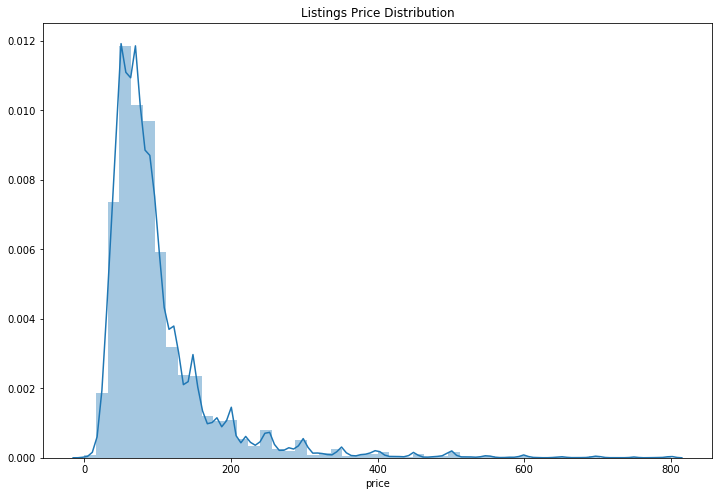

In [23]:
#TODO - Visualize Price distribution
### STRIP_START
plt.figure(figsize=(12, 8))
plt.title("Listings Price Distribution")
sns.distplot(data["price"]);
### STRIP_END

In [24]:
#TODO - Visualize Price Distribution
### STRIP_START
print("Comments:\n\
- Almost all listings (99%) have a price contained within 0 and 200$ daily.\n\
- 50% of listings have a price that vary between 55$ and 119$ (IQR). 50% outside this range.\n\
- Overall, the mean price is around 100$ daily.\n\
- We observe some spikes at 'round' values such 200, 300, 400, ..., 1000, etc.")
### STRIP_END

Comments:
- Almost all listings (99%) have a price contained within 0 and 200$ daily.
- 50% of listings have a price that vary between 55$ and 119$ (IQR). 50% outside this range.
- Overall, the mean price is around 100$ daily.
- We observe some spikes at 'round' values such 200, 300, 400, ..., 1000, etc.


**Q4**. Let's try to get a better understanding of price variation by visualizing geographically our data:
- Visualize the listings categorized as "Entire Home/apt" on a map.

> 🔦 **Hint**: No need for complex functions, `sns.scatterplot` should work perfectly!

- Visualize this same map with varying color depending on the price
- Make sure the column `neighbourhood_cleansed` is cleaned by observing the data points with varying color depending on the neighbourhood

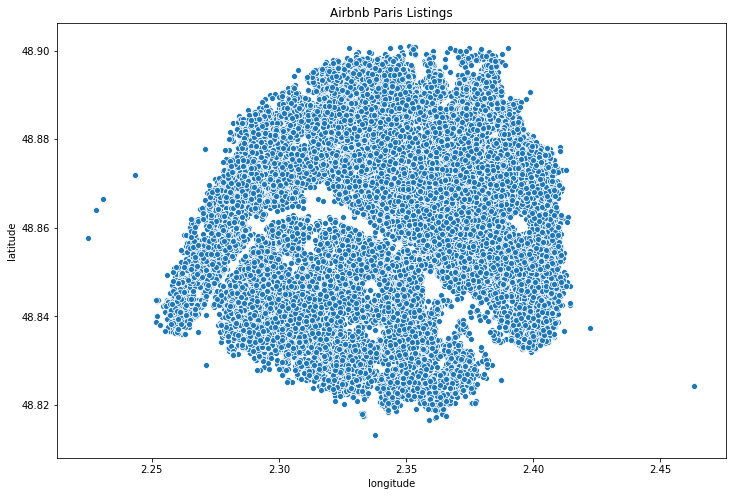

In [26]:
#TODO - Geo Visualization
### STRIP_START
plt.figure(figsize=(12, 8))
plt.title("Airbnb Paris Listings")
sns.scatterplot(x="longitude", y="latitude", data=data)
plt.show()
### STRIP_END

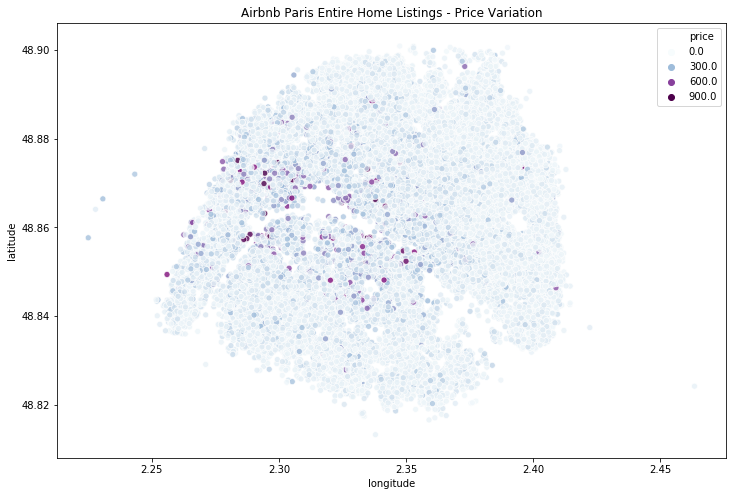

As we could expect, higher prices listings are in the heart of Paris and close totouristic places


In [35]:
#TODO - Geo Visualization
### STRIP_START
plt.figure(figsize=(12, 8))
plt.title("Airbnb Paris Entire Home Listings - Price Variation")
data_entire_home = data[data["room_type"] == "Entire home/apt"]
sns.scatterplot(x="longitude",
                y="latitude",
                hue="price",
                alpha=0.8,
                palette="BuPu",
                data=data_entire_home)
plt.show()
print("As we could expect, higher prices listings are in the heart of Paris and close to\
touristic places")
### STRIP_END

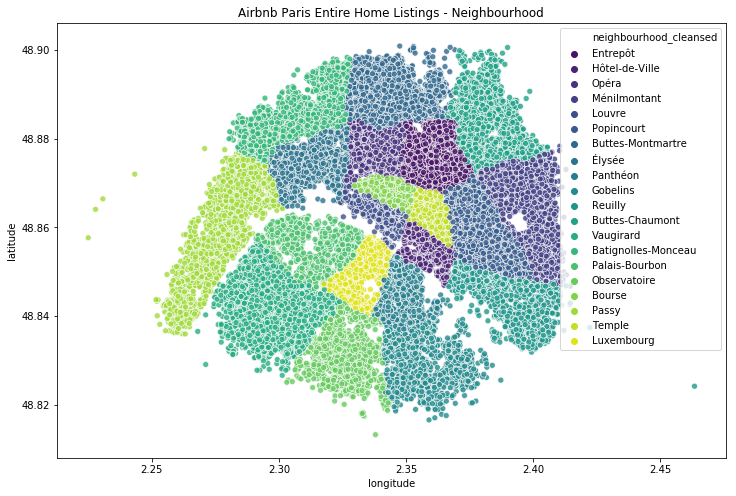

Variable `neighbourhood_cleansed` seems to be clean


In [33]:
#TODO - Geo Visualization
### STRIP_START
plt.figure(figsize=(12, 8))
plt.title("Airbnb Paris Entire Home Listings - Neighbourhood")
data_entire_home = data[data["room_type"] == "Entire home/apt"]
sns.scatterplot(x="longitude",
                y="latitude",
                hue="neighbourhood_cleansed",
                alpha=0.8,
                palette="viridis",
                data=data_entire_home)
plt.show()
print("Variable `neighbourhood_cleansed` seems to be clean")
### STRIP_END

**Q5**. Compute **median price depending on the neighbourhood**. Which districts appear the most and the less expensive?

Draw a nice visualization of these prices discrepancies (differences).

In [37]:
#TODO - Price per district
### STRIP_START
median_price_per_district = data.groupby("neighbourhood_cleansed")["price"].median().sort_values()
median_price_per_district
### STRIP_END

neighbourhood_cleansed
Ménilmontant            60.0
Buttes-Chaumont         60.0
Gobelins                65.0
Buttes-Montmartre       69.0
Reuilly                 70.0
Popincourt              70.0
Observatoire            70.0
Batignolles-Monceau     75.0
Entrepôt                75.0
Vaugirard               80.0
Opéra                   88.0
Panthéon                90.0
Passy                   99.0
Bourse                 100.0
Palais-Bourbon         105.0
Temple                 105.0
Luxembourg             110.0
Hôtel-de-Ville         110.0
Louvre                 115.0
Élysée                 120.0
Name: price, dtype: float64

In [207]:
#TODO - Price per district
### STRIP_START
print("\
- Ménilmontant appears as the cheapest district\n\
- Élysée appears as the most expensive")
### STRIP_END

- Ménilmontant appears as the cheapest district
- Élysée appears as the most expensive


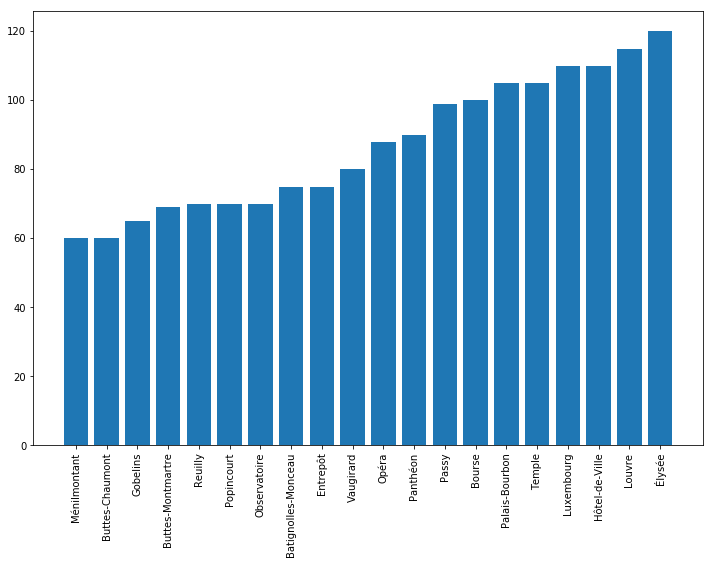

In [42]:
#TODO - Price per district
### STRIP_START
# METHOD 1
# We can visualize median_price_per_district with an histogram
plt.figure(figsize=(12,8))
plt.bar(x=median_price_per_district.index,
        height=median_price_per_district);
plt.xticks(rotation=90)
plt.show()
### STRIP_END

/anaconda3/envs/vivaenv/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


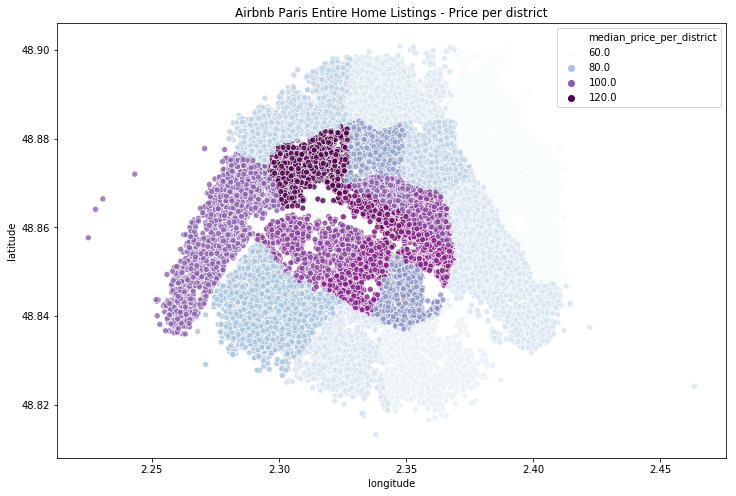

Central neighbourhoods appear more expensive as expected!


In [43]:
#TODO - Price per district
### STRIP_START
# METHOD 2
# Or we can even display data points with mean price per district.
# To do that, we first need to add a column to our DataFrame

# To create new column `median_price_per_district`, we apply the function lambda
# that maps the key district to its mean price. Ex: median_price_per_district["Louvre"] = 115
data_entire_home["median_price_per_district"] = data_entire_home["neighbourhood_cleansed"].apply(
    lambda x: median_price_per_district[x])

plt.figure(figsize=(12, 8))
plt.title("Airbnb Paris Entire Home Listings - Price per district")
sns.scatterplot(x="longitude",
                y="latitude",
                hue="median_price_per_district",
                alpha=0.8,
                palette="BuPu",
                data=data_entire_home)
plt.show()
print("Central neighbourhoods appear more expensive as expected!")
### STRIP_END

**Q6**. Play with the dataset and draw nice and impactful visualizations!

In [44]:
#TODO - More dataviz!
### STRIP_START
# You can have a look a these resources for inspiration:
#    - https://docs.google.com/presentation/d/1dShCpHl9UuVHzVdXqi681p0b0J8rCQKT6qhkjXF5H_8
#    - https://medium.com/datadriveninvestor/exploratory-data-analysis-on-airbnb-properties-in-paris-bce61bd680c8        
### STRIP_END